### Task-04
### PRODIGY INFOTECH
#### Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

**Dataset: https://www.kaggle.com/gti-upm/leapgestrecog**


#### **Explanation**
* #### Loading and Preprocessing:

#### Images are loaded in grayscale, resized, and appended to image_data along with their class indices.
* #### Visualization:

#### Displays a few sample images from the dataset with their corresponding labels.
* #### Normalization and Encoding:

#### The images are normalized by dividing pixel values by 255.0.
#### The labels are one-hot encoded to make them suitable for categorical classification.
* #### Model Building:

#### A CNN model is built using Conv2D, Activation, MaxPooling2D, Dropout, Flatten, and Dense layers.
#### The model is compiled using the Adam optimizer and categorical cross-entropy loss.
* #### Model Training:

#### The model is trained for 20 epochs with a validation split of 20%.
#### The training and validation accuracy and loss are plotted.
* #### Evaluation:

#### The model's performance on the test set is evaluated, and the test accuracy is printed.
#### A confusion matrix is plotted to visualize the performance of the model across different classes.
#### This cleaned and enhanced code should run without issues and provide a comprehensive workflow for hand gesture recognition using CNNs.

## **Full Pipeline for Preprocessing and Visualizing Data**

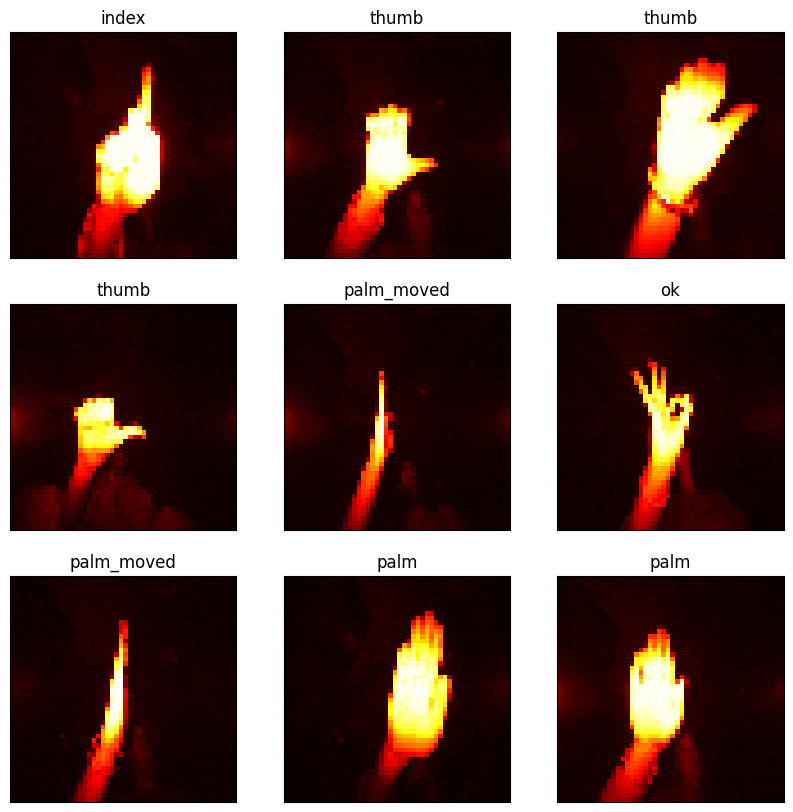

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Input data shape: (20000, 50, 50, 1)
Label shape: (20000, 10)


In [34]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random

# Importing layers for the model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout

# Define categories and image size
CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', 
              '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50

# Path to dataset
data_path = "/kaggle/input/leapgestrecog/leapGestRecog"

# Loading images and their classes (0-9)
image_data = []

for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

# Shuffle the data
random.shuffle(image_data)

# Splitting data into input features and labels
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

# Display some sample images
plt.figure(1, figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

# Normalizing the data
input_data = np.array(input_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add channel dimension
label = np.array(label)
input_data = input_data / 255.0

# One-hot encoding
label = keras.utils.to_categorical(label, num_classes=10)
print(label[0])

# Check input data shape
print(f'Input data shape: {input_data.shape}')
print(f'Label shape: {label.shape}')


## **Building and Training the Model**

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.7162 - loss: 0.8066 - val_accuracy: 0.9973 - val_loss: 0.0079
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9916 - loss: 0.0241 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9965 - loss: 0.0128 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 3.5334e-04
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9998 - val_loss: 2.6214e-04
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 5.9375e-04
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9981 - los

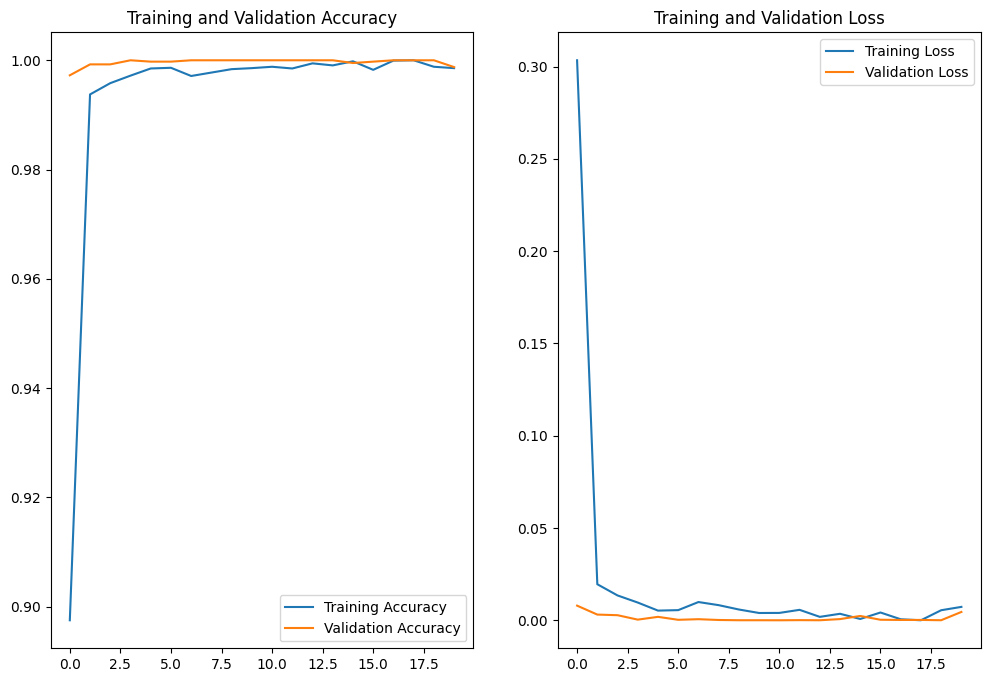

In [29]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(input_data, label, epochs=20, validation_split=0.2, batch_size=32)

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9998 - loss: 4.4676e-04
Test accuracy: 99.98%
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


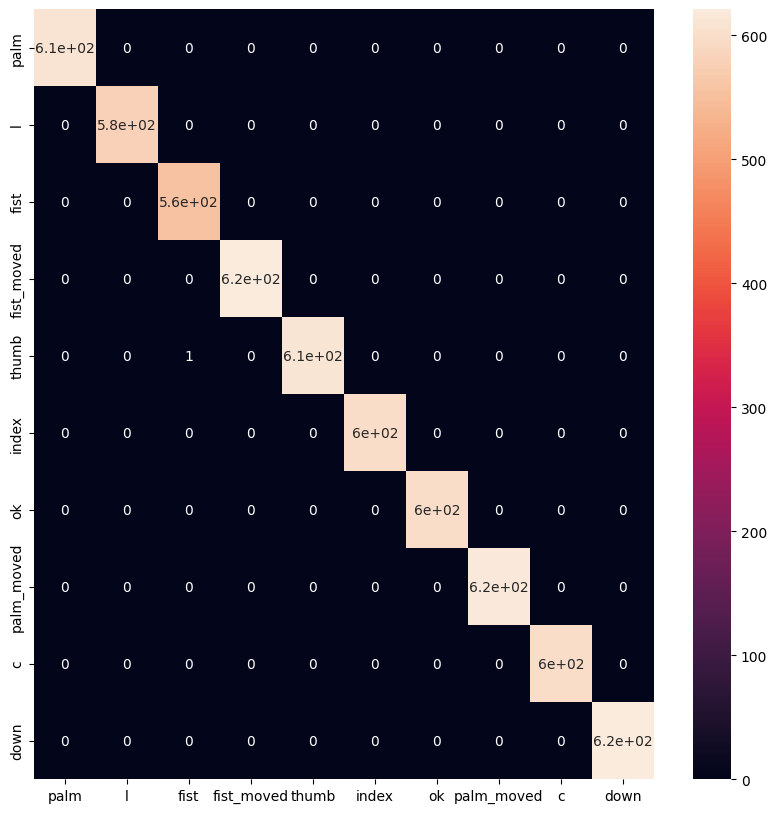

In [32]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))

# Confusion Matrix
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat)
plt.show()